In [1]:
%load_ext autoreload
%autoreload 2
from utils.data_generator import DataGenerator
from utils.myutils import Utils
import matplotlib.pyplot as plt
import random
import json
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
utils = Utils()
import time

2023-12-04 15:27:13.686305: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 15:27:13.721469: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [75]:
df = pd.read_json("experiments/complete/000_datasets_01_47_normal_01_results.json")

In [91]:
df.loc[df[df.dataset != "34_smtp"].groupby('dataset').val_auc_roc.idxmax()].to_json("experiments/complete/000_datasets_01_47_normal_03_best.json")

In [70]:
pearson = []
x = "test_auc_roc"
for dataset in df.dataset.unique():
    df_filter = df[(df.dataset == dataset)]
    try:
        result = {
            "dataset": dataset,
            "pearson_auc_roc": pearsonr(df_filter[x], df_filter["val_auc_roc"]).statistic,
            "pearson_auc_pr": pearsonr(df_filter[x], df_filter["val_auc_pr"]).statistic,
            "pearson_reconstruct_error": pearsonr(
                df_filter[x], df_filter["val_reconstruct_error"]
            ).statistic,
            "pearson_negative_elbo": pearsonr(df_filter[x], df_filter["negative_elbo"]).statistic,
        }
    except:
        result = {
            "dataset": dataset,
            "pearson_auc_roc": 0.0,
            "pearson_auc_pr": 0.0,
            "pearson_reconstruct_error": 0.0,
            "pearson_negative_elbo": 0.0,
        }
    pearson.append(result)  

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [73]:
df_pearson = pd.DataFrame(pearson).sort_values("pearson_auc_pr", ascending = False).reset_index(drop=True)

In [74]:
pd.DataFrame(pearson).to_json("experiments/complete/000_datasets_01_47_normal_01_pearson.json", orient = "records")

In [ ]:
df[
    [
        "test_auc_roc",
        "val_auc_pr",
        "val_auc_roc",
        "val_reconstruct_error",
        "negative_elbo",
    ]
].head(5)

In [102]:
df_best = pd.read_json("experiments/complete/000_datasets_01_47_normal_03_best.json", orient= "records")

In [104]:
df_best.to_json("experiments/complete/000_datasets_01_47_normal_03_best.json", orient= "records")

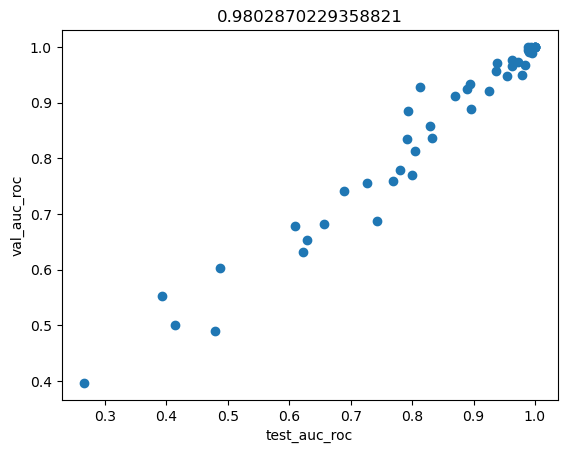

In [106]:
df = df_best
x, y = "test_auc_roc", "val_auc_roc"
plt.scatter(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(pearsonr(df[x], df[y]).statistic)
None

In [109]:
df_best

,dataset,n_samples,n_features,n_anomaly,pct_anomaly,domain,kernel,batch_size,learning_rate,loss,...,n_epochs,negative_elbo,train_loss_curve,val_auc_roc,val_auc_pr,test_auc_roc,test_auc_pr,training_time,inference_time,val_reconstruct_error
2,01_ALOI,49534,27,1508,3.04,Image,matern_3_2,128,0.01,normal,...,1000,39.599663,"[63.9685173035, 51.5946922302, 54.2713317871, ...",0.602816,0.041317,0.487819,0.037359,57.352969,0.018954,0.860081
72,02_annthyroid,7200,6,534,7.42,Healthcare,matern_1_2,128,0.01,normal,...,1000,8.816368,"[13.4261426926, 16.6498508453, 12.6917667389, ...",0.741543,0.302646,0.688451,0.201403,24.380797,0.007923,0.787808
147,03_backdoor,95329,196,2329,2.44,Network,matern_3_2,128,0.01,normal,...,1000,192.960083,"[307.705078125, 278.2783508301, 276.4291381836...",0.857240,0.332148,0.828376,0.291276,56.668395,0.051038,0.457606
238,04_breastw,683,9,239,34.99,Healthcare,rbf,128,0.01,normal,...,1000,48.485409,"[14.6280183792, 13.7983617783, 13.2196397781, ...",0.988913,0.980707,0.995024,0.991269,11.774656,0.004971,0.845686
347,05_campaign,41188,62,4640,11.27,Finance,rbf,128,0.01,normal,...,1000,91.503571,"[126.4714889526, 119.1769638062, 119.943336486...",0.754987,0.312167,0.726689,0.267521,40.113934,0.020846,0.862985
398,06_cardio,1831,21,176,9.61,Healthcare,matern_3_2,128,0.01,normal,...,1000,32.608635,"[46.5310745239, 42.0167007446, 41.9402885437, ...",0.966179,0.770898,0.962608,0.602029,19.249456,0.007363,0.723680
458,07_Cardiotocography,2114,21,466,22.04,Healthcare,matern_3_2,128,0.01,normal,...,1000,27.753548,"[48.3813514709, 42.3867759705, 38.8581161499, ...",0.769252,0.543231,0.799965,0.542339,16.546252,0.007133,0.654818
516,08_celeba,202599,39,4547,2.24,Image,matern_1_2,128,0.01,normal,...,1000,90.633057,"[92.524772644, 82.6272964478, 80.7103271484, 8...",0.884948,0.141312,0.793924,0.222063,66.820862,0.020216,1.004443
612,09_census,299285,500,18568,6.20,Sociology,matern_1_2,128,0.01,normal,...,1000,765.422180,"[982.270690918, 1053.763671875, 1020.586608886...",0.682318,0.091809,0.656169,0.090801,116.339046,0.261884,1.008239
688,10_cover,286048,10,2747,0.96,Botany,rbf,128,0.01,normal,...,1000,13.717188,"[21.0146789551, 20.1863613129, 21.0484428406, ...",0.976110,0.271619,0.962198,0.117461,29.539123,0.009346,0.640417
